In [290]:
%load_ext autoreload
%autoreload 2

from lib import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [433]:
train_loader,test_loader = get_dataloaders(128)

cuda:0


In [434]:
cnn,test_accs,train_accs = train_network(ConvNet(),train_loader,test_loader,epochs=15)

Finished Training
Test Accuracy=88.670
Train Accuracy=88.670


In [435]:
viz = ModelVisualizer(cnn, (1,1,28,28), torch.device('cuda'))

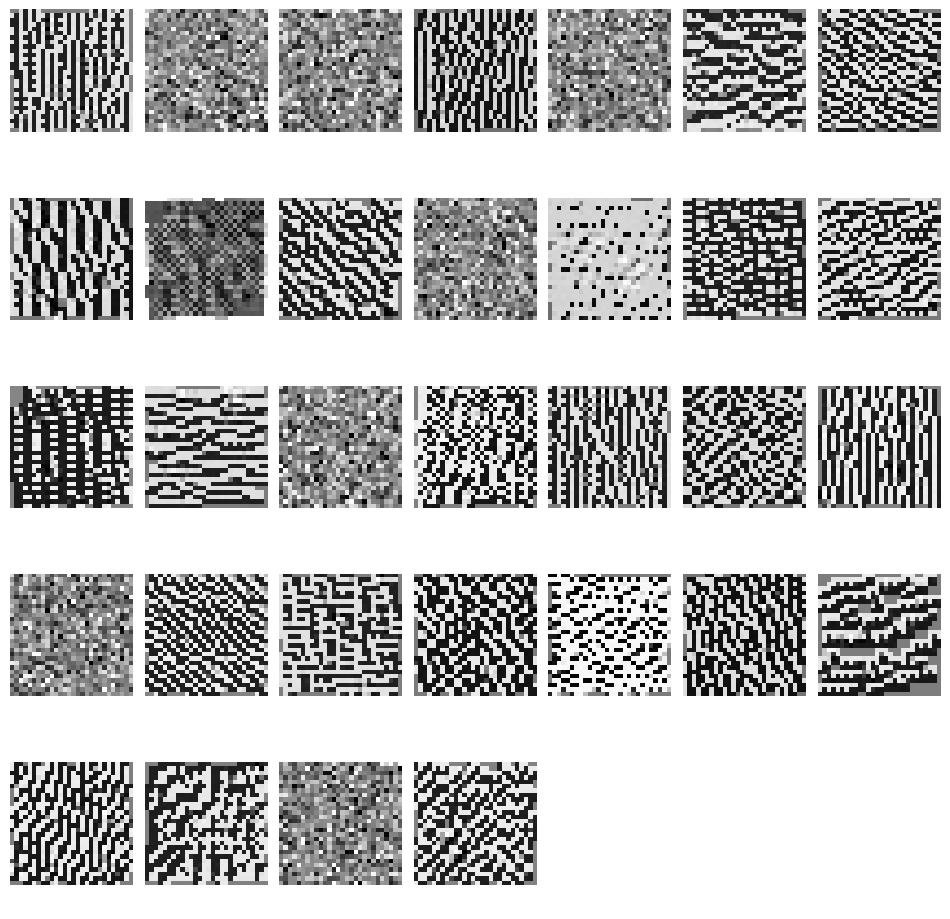

In [436]:
l1_patterns = [
    viz.optimize_input(
        layer_no=0,
        target_index=i
    ).cpu().detach().reshape((28,28)) for i in range(32)
]
show_images(l1_patterns)

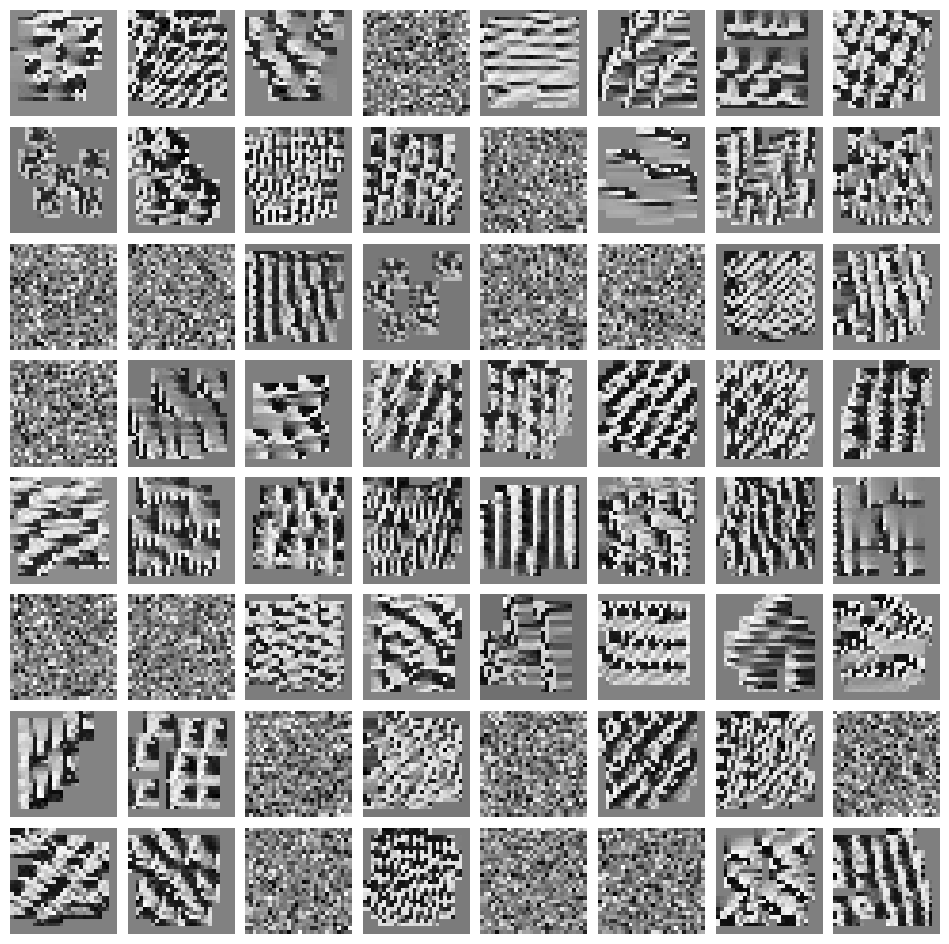

In [437]:
l2_patterns = [
    viz.optimize_input(
        layer_no=1,
        target_index=i,
        epochs=1000
    ).cpu().detach().reshape((28,28)) for i in range(64)
]
show_images(l2_patterns)

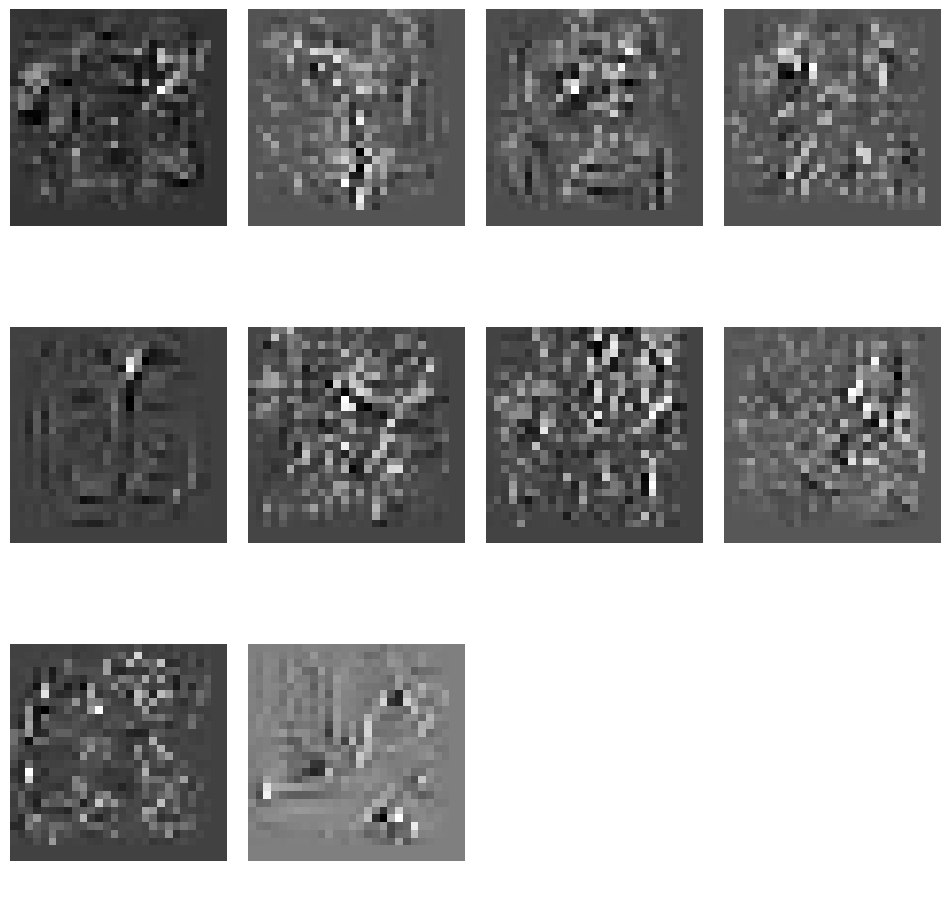

In [438]:
l3_patterns = [
    viz.optimize_input(
        layer_no=2,
        target_index=i,
        epochs=5000
    ).cpu().detach().reshape((28,28)) for i in range(10)
]
show_images(l3_patterns)

In [195]:
l1_maps = [cnn.conv1(test_img.to(DEVICE))[i,:].cpu().detach() for i in range(32)]

IndexError: list index out of range

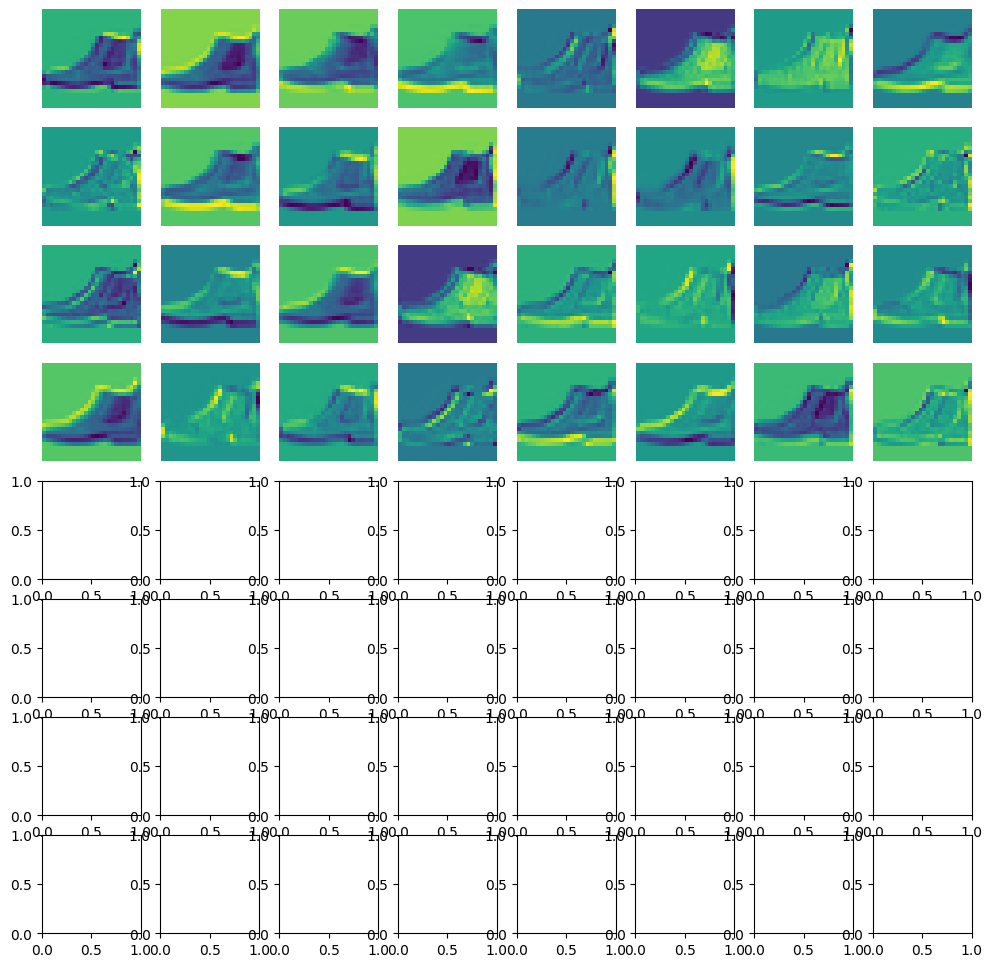

In [196]:
show_images(l1_maps)